# Predictive Analytics

In [1]:
import pandas as pd
import numpy as np

# plots library
import matplotlib.pyplot as plt
import seaborn as sns

# regression library
from statsmodels.formula.api import ols

In [2]:
# Import dataset
taiwan_real_estate = pd.read_csv('data/taiwan_real_estate2.csv')

## 1 - Numeric Explanatory Variable
### Explore dataset and plot

In [3]:
# Check dataset
taiwan_real_estate.head()

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq
0,84.87882,10,30 to 45,11.467474
1,306.59470,9,15 to 30,12.768533
2,561.98450,5,0 to 15,14.311649
3,561.98450,5,0 to 15,16.580938
4,390.56840,5,0 to 15,13.040847


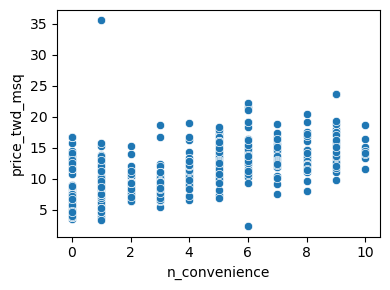

In [4]:
# scatter plot
plt.figure(figsize=(4, 3))
sns.scatterplot(x="n_convenience",
                y="price_twd_msq",
                data=taiwan_real_estate)
# Show the plot
plt.tight_layout()
plt.show()

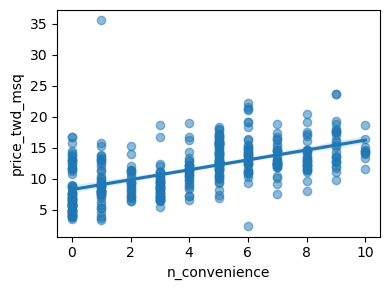

In [5]:
# Trend line on the scatter plot
plt.figure(figsize=(4, 3))
sns.regplot(x="n_convenience",
        y="price_twd_msq",
        data=taiwan_real_estate,
        ci=95,
        scatter_kws={'alpha': 0.5})

# Show the plot
plt.tight_layout()
plt.show()

## Response and Explanatory variables
- Import statsmodels
- Create model object
- fit model
- show fitted parameters

In [6]:
# Create the model object
mdl_price_vs_conv = ols('price_twd_msq ~ n_convenience', data=taiwan_real_estate)

# Fit the model
mdl_price_vs_conv = mdl_price_vs_conv.fit()

# Print the parameters of the fitted model
print(mdl_price_vs_conv.params)

Intercept        8.224237
n_convenience    0.798080
dtype: float64


## 2- Categorical Explanatory Variable
### Explore dataset and plot

In [7]:
mean_price_by_age = taiwan_real_estate.groupby('house_age_years')['price_twd_msq'].mean()
print(mean_price_by_age)

house_age_years
0 to 15     12.637471
15 to 30     9.876743
30 to 45    11.393264
Name: price_twd_msq, dtype: float64


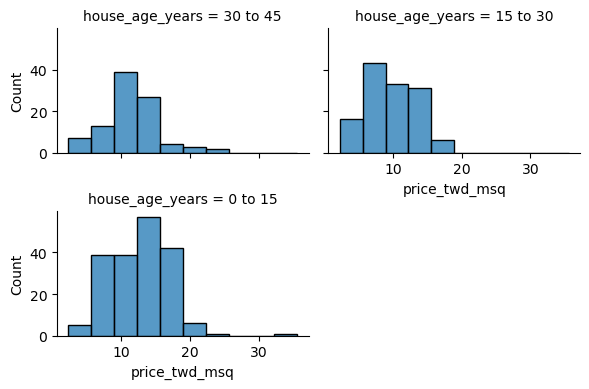

In [8]:
# Plot histogram
sns.displot(data=taiwan_real_estate,
            x='price_twd_msq',
            col='house_age_years',
            col_wrap=2,
            bins=10,
            height=2,
            aspect=1.5)

# Show the plot
plt.show()

## Response and Explanatory variables
- Import statsmodels
- Create model object
- fit model
- show fitted parameters

In [9]:
# Create the model, fit it
mdl_price_vs_age = ols('price_twd_msq ~ house_age_years', data=taiwan_real_estate).fit()

# Print the parameters of the fitted model
print(mdl_price_vs_age.params)

Intercept                      12.637471
house_age_years[T.15 to 30]    -2.760728
house_age_years[T.30 to 45]    -1.244207
dtype: float64


In [10]:
# In case of a single, categorical variable,coefficients are the means
# Updated model formula to remove the intercept
mdl_price_vs_age0 = ols("price_twd_msq ~ house_age_years + 0", data=taiwan_real_estate).fit()

# Print the parameters of the fitted model
print(mdl_price_vs_age0.params)

house_age_years[0 to 15]     12.637471
house_age_years[15 to 30]     9.876743
house_age_years[30 to 45]    11.393264
dtype: float64


# 3- Predictive Analytics

### Creating explanatory data
- Use fit model to predict
- plot data

In [11]:
# Create the explanatory_data 
explanatory_data = pd.DataFrame({'n_convenience': np.arange(0,11)})

# Use fit model (mdl_price_vs_conv) to predict with explanatory_data
price_twd_msq = mdl_price_vs_conv.predict(explanatory_data)

# Create prediction_data
prediction_data = explanatory_data.assign(
    price_twd_msq = price_twd_msq)

prediction_data.head()

,n_convenience,price_twd_msq
0,0,8.224237
1,1,9.022317
2,2,9.820397
3,3,10.618477
4,4,11.416556


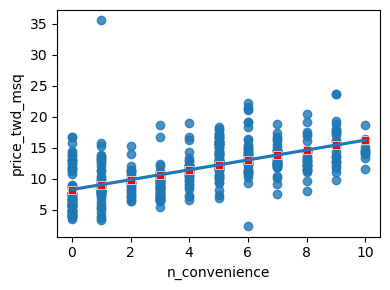

In [12]:
# Create plot
fig = plt.figure(figsize=(4,3))

sns.regplot(x="n_convenience",
            y="price_twd_msq",
            data=taiwan_real_estate,
            ci=None)

# Add a scatter plot layer to the regplot
sns.scatterplot(x="n_convenience",
            y="price_twd_msq",
            data=prediction_data,
            color='red',
               marker='s')

# Show the plot
plt.tight_layout()
plt.show()

### Using original dataset
- Fitted vaues, residual and summary
- Use fit model to predict
- plot data

In [13]:
# Print the fitted values of mdl_price_vs_conv
print(mdl_price_vs_conv.fittedvalues)

0      16.205035
1      15.406955
2      12.214636
3      12.214636
4      12.214636
         ...    
409     8.224237
410    15.406955
411    13.810795
412    12.214636
413    15.406955
Length: 414, dtype: float64


In [14]:
# Print the residuals of mdl_price_vs_conv
print(mdl_price_vs_conv.resid)

0     -4.737561
1     -2.638422
2      2.097013
3      4.366302
4      0.826211
         ...   
409   -3.564631
410   -0.278362
411   -1.526378
412    3.670387
413    3.927387
Length: 414, dtype: float64


In [15]:
# Print a summary of mdl_price_vs_conv
print(mdl_price_vs_conv.summary())

                            OLS Regression Results                            
Dep. Variable:          price_twd_msq   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     199.3
Date:                Tue, 22 Apr 2025   Prob (F-statistic):           3.41e-37
Time:                        12:56:21   Log-Likelihood:                -1091.1
No. Observations:                 414   AIC:                             2186.
Df Residuals:                     412   BIC:                             2194.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         8.2242      0.285     28.857

In [16]:
# Create prediction_data
prediction_data = explanatory_data.assign(
    price_twd_msq = mdl_price_vs_conv.predict(explanatory_data))

#print
prediction_data.head()

,n_convenience,price_twd_msq
0,0,8.224237
1,1,9.022317
2,2,9.820397
3,3,10.618477
4,4,11.416556


# Regression to the mean

In [17]:
%reset -f
import pandas as pd
import numpy as np

# plots library
import matplotlib.pyplot as plt
import seaborn as sns

# regression library
from statsmodels.formula.api import ols

In [18]:
sp500_yearly_returns = pd.read_csv('data/sp500_yearly_returns.csv')

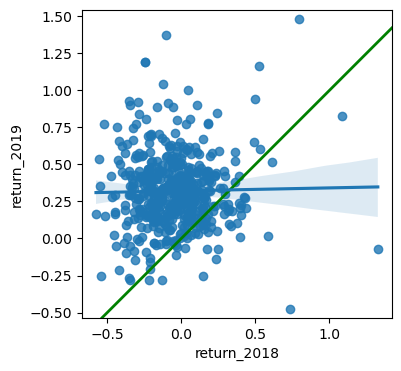

In [19]:
# Create a new figure, fig
fig = plt.figure(figsize=[4,4])

# Plot the first layer: y = x
plt.axline(xy1=(0,0), slope=1, linewidth=2, color="green")

# Add scatter plot with linear regression trend line
sns.regplot(x='return_2018', y='return_2019', data=sp500_yearly_returns)

# Set the axes so that the distances along the x and y axes look the same
plt.axis('equal')

# Show the plot
plt.show()

## Fit model

In [20]:
mdl_returns = ols("return_2019 ~ return_2018", data=sp500_yearly_returns).fit()

## Predict

In [21]:
# Create a DataFrame with return_2018 at -1, 0, and 1 
explanatory_data = pd.DataFrame({'return_2018': [-1,0,1]})

# Use mdl_returns to predict with explanatory_data
print(mdl_returns.predict(explanatory_data))

0    0.301251
1    0.321321
2    0.341390
dtype: float64


# Transforming the explanatory variable
- When data is skwed, transform using for example sqrt or log10

In [22]:
%reset -f
import pandas as pd
import numpy as np

# plots library
import matplotlib.pyplot as plt
import seaborn as sns

# regression library
from statsmodels.formula.api import ols

In [23]:
# Import dataset
taiwan_real_estate = pd.read_csv('data/taiwan_real_estate2.csv')

In [24]:
# Create sqrt_dist_to_mrt_m
taiwan_real_estate["sqrt_dist_to_mrt_m"] =  np.sqrt(taiwan_real_estate["dist_to_mrt_m"])

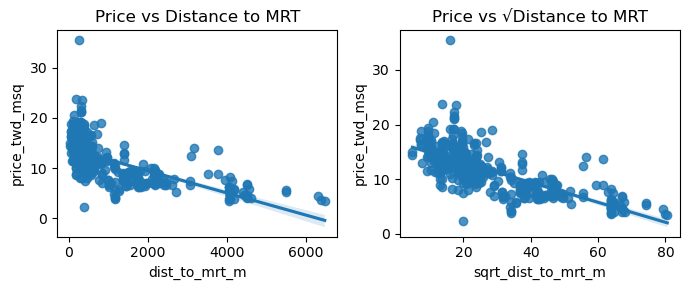

In [25]:
# Create figure and two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(7, 3))  # Adjust size as needed

# Plot 1: Using raw distance
sns.regplot(x="dist_to_mrt_m", y='price_twd_msq', data=taiwan_real_estate, ax=axes[0])
axes[0].set_title("Price vs Distance to MRT")

# Plot 2: Using sqrt(dist)
sns.regplot(x="sqrt_dist_to_mrt_m", y='price_twd_msq', data=taiwan_real_estate, ax=axes[1])
axes[1].set_title("Price vs √Distance to MRT")

# Tidy layout
plt.tight_layout()
plt.show()

In [26]:
# Run a linear regression of price_twd_msq vs. square root of dist_to_mrt_m using taiwan_real_estate
mdl_price_vs_dist = ols('price_twd_msq ~ sqrt_dist_to_mrt_m', data =taiwan_real_estate).fit()

# Print the parameters
mdl_price_vs_dist.params

Intercept             16.709799
sqrt_dist_to_mrt_m    -0.182843
dtype: float64

In [27]:
explanatory_data = pd.DataFrame({"sqrt_dist_to_mrt_m": np.sqrt(np.arange(0, 81, 10) ** 2),
                                "dist_to_mrt_m": np.arange(0, 81, 10) ** 2})

# Create prediction_data by adding a column of predictions to explantory_data
prediction_data = explanatory_data.assign(
    price_twd_msq = mdl_price_vs_dist.predict(explanatory_data)
)

# Print the result
print(prediction_data)

   sqrt_dist_to_mrt_m  dist_to_mrt_m  price_twd_msq
0                 0.0              0      16.709799
1                10.0            100      14.881370
2                20.0            400      13.052942
3                30.0            900      11.224513
4                40.0           1600       9.396085
5                50.0           2500       7.567656
6                60.0           3600       5.739227
7                70.0           4900       3.910799
8                80.0           6400       2.082370


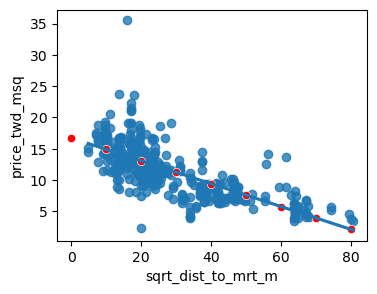

In [28]:
# Plot data with prediction model
fig = plt.figure(figsize=(4,3))
sns.regplot(x="sqrt_dist_to_mrt_m", y="price_twd_msq", data=taiwan_real_estate, ci=None)

# Add a layer of your prediction points
sns.scatterplot(x="sqrt_dist_to_mrt_m", y="price_twd_msq", data=prediction_data, color='red')
plt.show()

# Transforming the response variable

In [29]:
%reset -f
import pandas as pd
import numpy as np

# plots library
import matplotlib.pyplot as plt
import seaborn as sns

# regression library
from statsmodels.formula.api import ols

In [30]:
# Import dataset
ad_conversion = pd.read_csv('data/ad_conversion.csv')

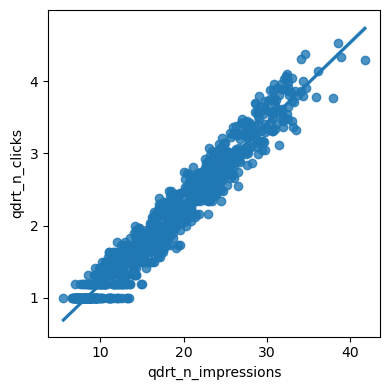

In [31]:
# Create qdrt_n_impressions and qdrt_n_clicks
ad_conversion["qdrt_n_impressions"] = ad_conversion["n_impressions"] ** 0.25
ad_conversion["qdrt_n_clicks"] = ad_conversion["n_clicks"] **0.25

plt.figure(figsize=(4,4))

# Plot using the transformed variables
sns.regplot(x="qdrt_n_impressions", y="qdrt_n_clicks", data=ad_conversion)
plt.tight_layout()
plt.show()

In [32]:
# Run a linear regression of your transformed variables
mdl_click_vs_impression = ols("qdrt_n_clicks ~ qdrt_n_impressions", data=ad_conversion).fit()

In [33]:
explanatory_data = pd.DataFrame({"qdrt_n_impressions": np.arange(0, 3e6+1, 5e5) ** .25,
                                 "n_impressions": np.arange(0, 3e6+1, 5e5)})

# Complete prediction_data
prediction_data = explanatory_data.assign(
    qdrt_n_clicks = mdl_click_vs_impression.predict(explanatory_data)
)

# Print the result
print(prediction_data)

   qdrt_n_impressions  n_impressions  qdrt_n_clicks
0            0.000000            0.0       0.071748
1           26.591479       500000.0       3.037576
2           31.622777      1000000.0       3.598732
3           34.996355      1500000.0       3.974998
4           37.606031      2000000.0       4.266063
5           39.763536      2500000.0       4.506696
6           41.617915      3000000.0       4.713520


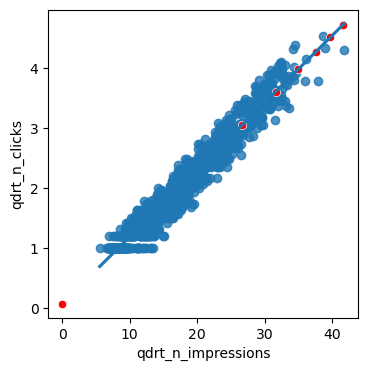

In [34]:
# Back transform qdrt_n_clicks
prediction_data["n_clicks"] = prediction_data["qdrt_n_clicks"] ** 4

# Plot the transformed variables
fig = plt.figure(figsize=(4,4))
sns.regplot(x="qdrt_n_impressions", y="qdrt_n_clicks", data=ad_conversion, ci=None)

# Add a layer of your prediction points
sns.scatterplot(x='qdrt_n_impressions', y='qdrt_n_clicks', data=prediction_data, color='red')
plt.show()